In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [137]:
df = pd.read_excel('Diabetes.xlsx').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [138]:
X = df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness',
         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.Outcome.values

In [139]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X,y)

DecisionTreeRegressor(max_leaf_nodes=3)

In [140]:
regr.score(X,y)

0.23482644772316652

[Text(0.4, 0.8333333333333334, 'x[1] <= 127.5\nsquared_error = 0.227\nsamples = 768\nvalue = 0.349'),
 Text(0.2, 0.5, 'squared_error = 0.156\nsamples = 485\nvalue = 0.194'),
 Text(0.6, 0.5, 'x[5] <= 29.95\nsquared_error = 0.237\nsamples = 283\nvalue = 0.615'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.216\nsamples = 76\nvalue = 0.316'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.2\nsamples = 207\nvalue = 0.725')]

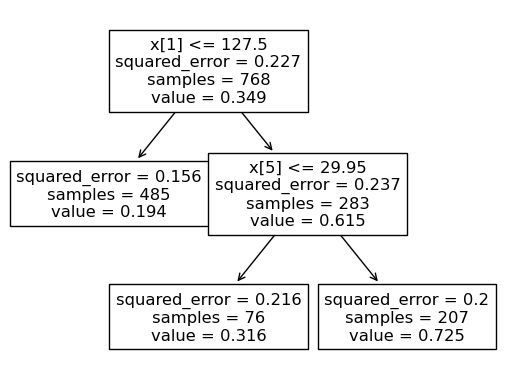

In [141]:
tree.plot_tree(regr)

[Text(0.4, 0.8333333333333334, 'Glucose <= 127.5\nsquared_error = 0.227\nsamples = 768\nvalue = 0.349'),
 Text(0.2, 0.5, 'squared_error = 0.156\nsamples = 485\nvalue = 0.194'),
 Text(0.6, 0.5, 'BMI <= 29.95\nsquared_error = 0.237\nsamples = 283\nvalue = 0.615'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.216\nsamples = 76\nvalue = 0.316'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.2\nsamples = 207\nvalue = 0.725')]

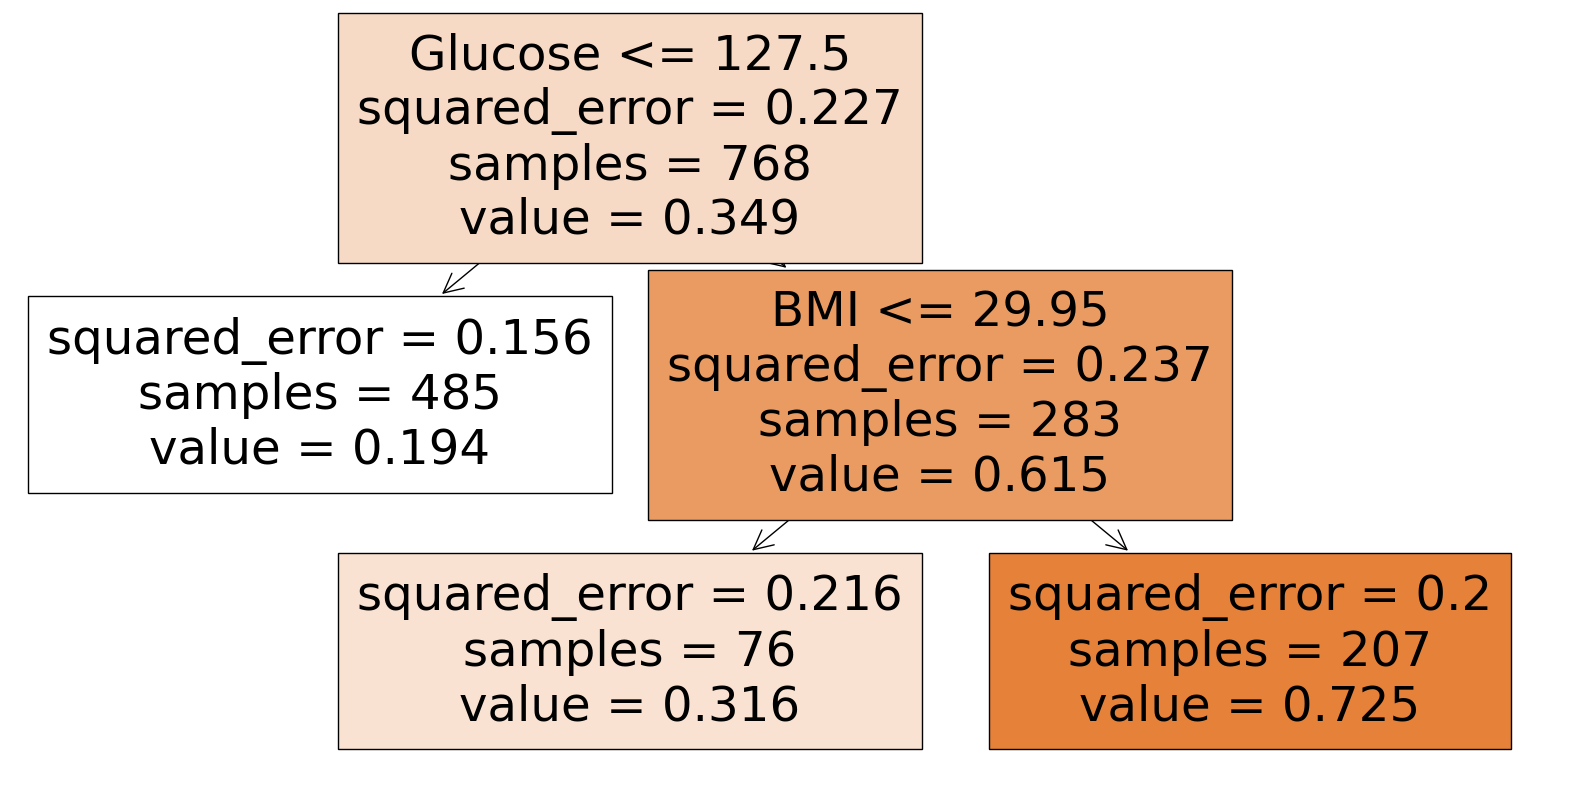

In [142]:
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Define class names for the "Outcome" variable
class_names = ["Non-Diabetic", "Diabetic"]

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(regr, filled=True, feature_names=feature_names, class_names=class_names)

In [143]:
df2 = pd.read_excel('Diabetes.xlsx').dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [144]:
#glucose 0-200/bmi 0-50

X2 = df2.drop('Outcome', axis=1)
y2 = pd.factorize(df2.Outcome)[0]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [145]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=6)

In [146]:
clf.score(X_train, y_train)

0.7638436482084691

In [147]:
mean_squared_error(y_test, clf.predict(X_test))

0.24025974025974026

[Text(0.4444444444444444, 0.875, 'x[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [221, 393]'),
 Text(0.2222222222222222, 0.625, 'x[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [65, 287]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.162\nsamples = 202\nvalue = [18, 184]'),
 Text(0.3333333333333333, 0.375, 'x[5] <= 26.35\ngini = 0.43\nsamples = 150\nvalue = [47, 103]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.475\nsamples = 121\nvalue = [47, 74]'),
 Text(0.6666666666666666, 0.625, 'x[5] <= 30.05\ngini = 0.482\nsamples = 262\nvalue = [156, 106]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.438\nsamples = 74\nvalue = [24, 50]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 157.5\ngini = 0.418\nsamples = 188\nvalue = [132, 56]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.482\nsamples = 116\nvalue = [69, 47]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.219\nsamples = 72\nvalue = [63, 9]')]

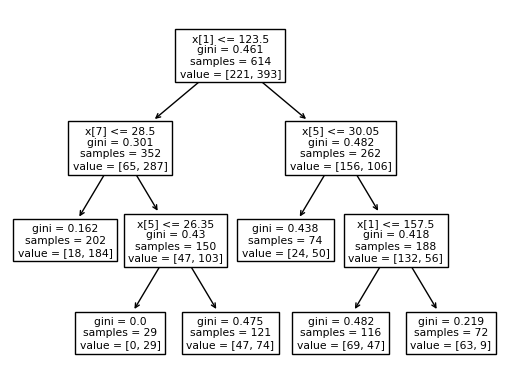

In [148]:
tree.plot_tree(clf)

In [149]:
df3 = pd.read_excel('Diabetes.xlsx').dropna()
X3 = df3.drop('Outcome', axis=1)
y3 = df3.Outcome

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.5, random_state=0)

In [150]:
regrFor = RandomForestRegressor(max_features=8, random_state=1)
regrFor.fit(X_train, y_train)

RandomForestRegressor(max_features=8, random_state=1)

Text(0, 0.5, 'y_test')

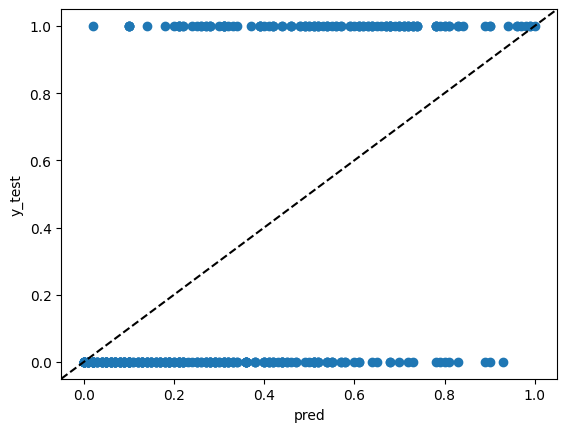

In [151]:
pred = regrFor.predict(X_test)

plt.scatter(pred, y_test, label='Outcome')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [152]:
mean_squared_error(y_test, pred)

0.15684270833333333

In [153]:
regrFor = RandomForestRegressor(max_features=4, random_state=1)
regrFor.fit(X_train, y_train)

RandomForestRegressor(max_features=4, random_state=1)

In [154]:
pred = regrFor.predict(X_test)
mean_squared_error(y_test, pred)

0.15338854166666668

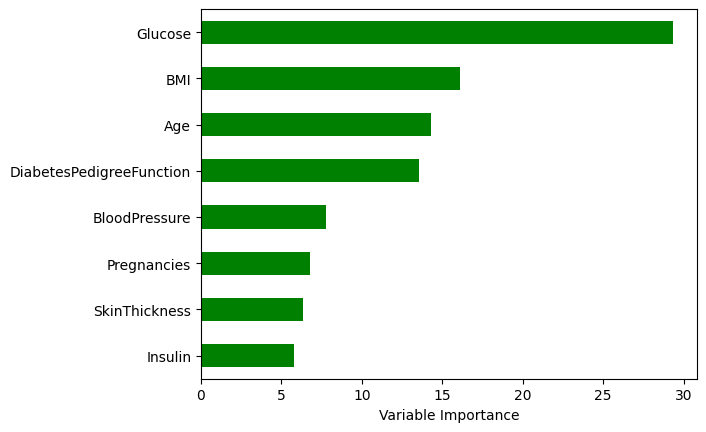

In [155]:
Importance = pd.DataFrame({'Importance':regrFor.feature_importances_*100}, index=X3.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

100


[Text(0.765625, 0.9642857142857143, 'x[1] <= 155.5\nsquared_error = 0.232\nsamples = 231\nvalue = 0.365'),
 Text(0.6145833333333334, 0.8928571428571429, 'x[6] <= 1.105\nsquared_error = 0.203\nsamples = 195\nvalue = 0.284'),
 Text(0.4125, 0.8214285714285714, 'x[5] <= 31.05\nsquared_error = 0.192\nsamples = 188\nvalue = 0.259'),
 Text(0.20416666666666666, 0.75, 'x[7] <= 41.0\nsquared_error = 0.114\nsamples = 86\nvalue = 0.131'),
 Text(0.125, 0.6785714285714286, 'x[0] <= 6.5\nsquared_error = 0.06\nsamples = 71\nvalue = 0.065'),
 Text(0.06666666666666667, 0.6071428571428571, 'x[3] <= 36.5\nsquared_error = 0.027\nsamples = 64\nvalue = 0.027'),
 Text(0.03333333333333333, 0.5357142857142857, 'x[6] <= 0.375\nsquared_error = 0.018\nsamples = 62\nvalue = 0.019'),
 Text(0.016666666666666666, 0.4642857142857143, 'squared_error = 0.0\nsamples = 36\nvalue = 0.0'),
 Text(0.05, 0.4642857142857143, 'x[0] <= 2.5\nsquared_error = 0.043\nsamples = 26\nvalue = 0.045'),
 Text(0.03333333333333333, 0.39285714

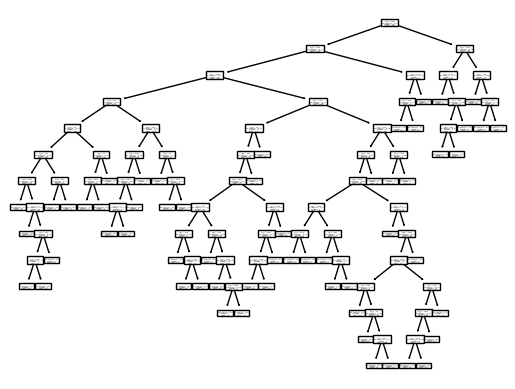

In [156]:
print(len(regrFor.estimators_))
tree.plot_tree(regrFor.estimators_[1])

In [157]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

SkinThickness                1.621945
Insulin                      3.912745
Pregnancies                  4.012223
BloodPressure                4.426905
DiabetesPedigreeFunction    12.998939
Age                         15.587051
BMI                         16.592948
Glucose                     40.847243
dtype: float64


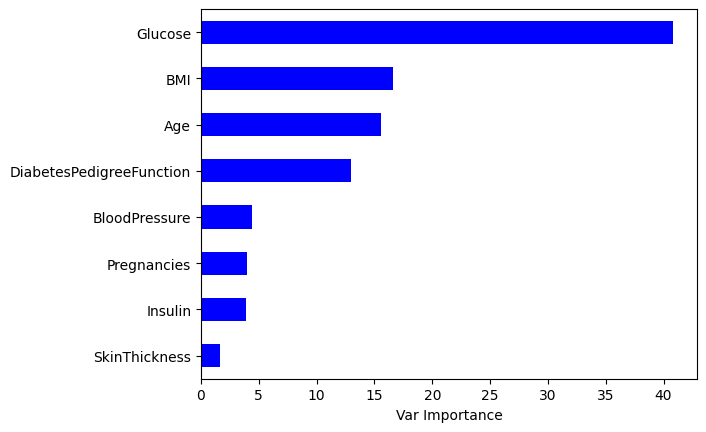

In [165]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X3.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='b', )
plt.xlabel('Var Importance')
plt.gca().legend_ = None

In [164]:
mean_squared_error(y_test, regr.predict(X_test))

0.15589187192603912